# Task 4

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.



In [5]:
!pip install Textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/624.3 kB 435.7 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/624.3 kB 573.4 kB/s eta 0:00:01
   ------- ------------------------------ 122.9/624.3 kB 722.1 kB/s eta 0:00:01
   --------------- ------------------------ 245.8/624.3 kB 1.2 MB/s eta 0:00:01
   -------------------------------- ------- 501.8/624.3 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------  614.4/624.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 15.4 MB/s eta 0:00:01
   ------------------------------ --------- 1.2/1.5 MB 12.2 MB/s eta 0:00:01
   

In [7]:
import pandas as pd
import textblob as Textblob
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("twitter_training.csv")

In [13]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [15]:
col_names = ['ID','Entity','Sentiments','Context']
df=pd.read_csv("twitter_training.csv",names = col_names)

In [17]:
df.head()

,ID,Entity,Sentiments,Context
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [19]:
df.shape

(74682, 4)

In [21]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiments  \
0      2401  Borderlands   Positive   
1      2401  Borderlands   Positive   
2      2401  Borderlands   Positive   
3      2401  Borderlands   Positive   
4      2401  Borderlands   Positive   
...     ...          ...        ...   
74677  9200       Nvidia   Positive   
74678  9200       Nvidia   Positive   
74679  9200       Nvidia   Positive   
74680  9200       Nvidia   Positive   
74681  9200       Nvidia   Positive   

                                                 Context  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that

In [23]:
df.isnull().sum()

ID              0
Entity          0
Sentiments      0
Context       686
dtype: int64

In [25]:
df.dropna(axis=0,inplace=True)

In [27]:
df.isnull().sum()

ID            0
Entity        0
Sentiments    0
Context       0
dtype: int64

In [29]:
df.duplicated().sum()

2340

In [31]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [33]:
df.shape

(71656, 4)

In [37]:
sentiment_counts = df['Sentiments'].value_counts()

In [39]:
sentiment_counts

Sentiments
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

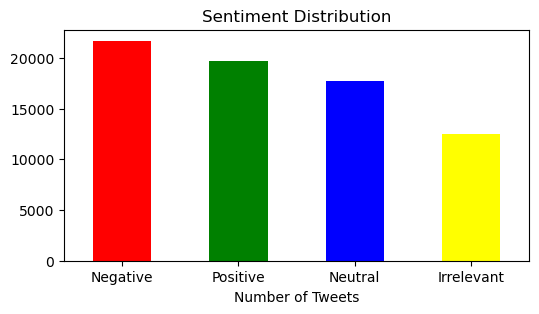

In [43]:
plt.figure(figsize=(6,3))
sentiment_counts.plot(kind='bar',color=['red','green','blue','yellow'])
plt.title("Sentiment Distribution")
plt.xlabel("Number of Tweets")
plt.xticks(rotation=0)
plt.show()

In [49]:
brand_data = df[df['Entity'].str.contains('Microsoft',case=False)]
brand_sentiment_count = brand_data['Sentiments'].value_counts()
brand_sentiment_count

Sentiments
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64

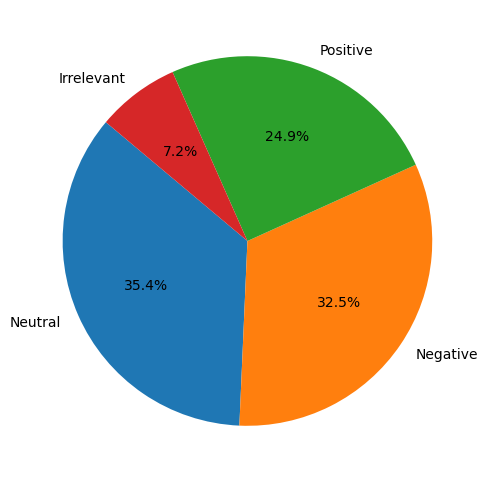

In [55]:
plt.figure(figsize=(6,6))
plt.pie(brand_sentiment_count,labels=brand_sentiment_count.index, autopct='%1.1f%%',startangle=140)
plt.show()